## SECOM Data Set Information

A complex modern semi-conductor manufacturing process is normally under consistent surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. It is often the case  that useful information is buried in the latter two. Engineers typically have a much larger number of signals than are actually required. If we consider each type  of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs.

Numerical data are recorded values from a series of sensors in the production machines that are placed in specified locations to help identify the part of the production process which contributes to the faults.


# Objective
To minimize the rate at which faulty products leave the factory, the numerical data starts to make sense. 

*   To enhance current business improvement techniques, we use feature selection techniques to rank features according to their impact on the overall yield for the product. 

    *   Causal relationships may also be considered with a view to identifying the key features.

Dimensionality reduction techniques:

- Percent Missing Values
- Ammount of Variation
- Pairwise Correlation
- Correlation with Target
- Recursive feature elimination

In [ ]:
%pip install matplotlib --upgrade

<h2 id="importing_libraries">Importing required libraries</h2>


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

from scipy import stats


import warnings
import os

warnings.filterwarnings('ignore')
%matplotlib inline

# Data Understanding / Descriptive Analysis
1. Histogram of volatilites of features
2. Histogram of percentage of missing values of features
3. Frequency distribution of target values
4. Correlation heatmap

# Manufacturing Operation Data (Feature Data/Sensor Data)

In [2]:
# Read Manufacturing Operation Data (Feature Data/Sensor Data)
sensor_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data",sep=" ", header=None)
sensor_data

0        1          2          3       4      5         6       7    \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
...       ...      ...        ...        ...     ...    ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843  100.0   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763  100.0   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236  100.0   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726  100.0   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978  100.0   85.1011  0.1235   

         8       9    ...     580       581     582     583     584      585  \
0     1.5005  0.0162  ...     NaN       NaN  0.5005  0.0118  0.0035   2.3630   
1     1.4966 -0.0005  ...  0.0060  208.2045  0.5019  0.0223  0.0055   4.4447   
2     1.4436  0.0041  ...  0.0148   82.8602  0.4958  0.0157  0.0039   3.1745   
3     1.4882 -0.0124  ...  0.0044   73.8432  0.4990  0.0103  0.0025   2.0544   
4     1.5031 -0.0031  ...     NaN       NaN  0.4800  0.4766  0.1045  99.3032   
...      ...     ...  ...     ...       ...     ...     ...     ...      ...   
1562  1.3424 -0.0045  ...  0.0047  203.1720  0.4988  0.0143  0.0039   2.8669   
1563  1.4333 -0.0061  ...     NaN       NaN  0.4975  0.0131  0.0036   2.6238   
1564     NaN     NaN  ...  0.0025   43.5231  0.4987  0.0153  0.0041   3.0590   
1565  1.4622 -0.0072  ...  0.0075   93.4941  0.5004  0.0178  0.0038   3.5662   
1566     NaN     NaN  ...  0.0045  137.7844  0.4987  0.0181  0.0040   3.6275   

         586     587     588       589  
0        NaN     NaN     NaN       NaN  
1     0.0096  0.0201  0.0060  208.2045  
2     0.0584  0.0484  0.0148   82.8602  
3     0.0202  0.0149  0.0044   73.8432  
4     0.0202  0.0149  0.0044   73.8432  
...      ...     ...     ...       ...  
1562  0.0068  0.0138  0.0047  203.1720  
1563  0.0068  0.0138  0.0047  203.1720  
1564  0.0197  0.0086  0.0025   43.5231  
1565  0.0262  0.0245  0.0075   93.4941  
1566  0.0117  0.0162  0.0045  137.7844  

[1567 rows x 590 columns]

In [3]:
# Data types in Feature Data
type_dct_features = {str(k): len(list(v)) for k, v in sensor_data.groupby(sensor_data.dtypes, axis=1)}
type_dct_features

{'float64': 590}

In [4]:
# Add prefix "feature" to each column
sensor_data = sensor_data.add_prefix("feature")

In [5]:
# create dataframe for descriptive analysis 
descriptive_sensor = sensor_data.describe().transpose()

# add column for number of unique values of each column
descriptive_sensor["unique"] = sensor_data.nunique()

# add column for percentage of missing values of each column
descriptive_sensor["missing_percentage"] = sensor_data.isnull().sum() * 100 / len(sensor_data)

# define outliers based on 3s rule
def outliers_z_score(df):
    outliers_list = []
    threshold = 3

    for i in df.columns:
        ys = df[i]
        try:
            mean_y = np.mean(ys)
            stdev_y = np.std(ys)
            z_scores = [(y - mean_y) / stdev_y for y in ys]
            idx_outliers = np.where(np.abs(z_scores) > threshold)
            outliers_list.append(len(idx_outliers[0]))
        except:
            outliers_list.append(np.NAN)
    return outliers_list

# add column for number of outliers of each column
outlierls = outliers_z_score(sensor_data)
descriptive_sensor["outliers"] = outlierls


In [6]:
descriptive_sensor

count         mean         std        min          25%  \
feature0    1561.0  3014.452896   73.621787  2743.2400  2966.260000   
feature1    1560.0  2495.850231   80.407705  2158.7500  2452.247500   
feature2    1553.0  2200.547318   29.513152  2060.6600  2181.044400   
feature3    1553.0  1396.376627  441.691640     0.0000  1081.875800   
feature4    1553.0     4.197013   56.355540     0.6815     1.017700   
...            ...          ...         ...        ...          ...   
feature585  1566.0     3.067826    3.578033     1.1975     2.306500   
feature586  1566.0     0.021458    0.012358    -0.0169     0.013425   
feature587  1566.0     0.016475    0.008808     0.0032     0.010600   
feature588  1566.0     0.005283    0.002867     0.0010     0.003300   
feature589  1566.0    99.670066   93.891919     0.0000    44.368600   

                   50%          75%        max  unique  missing_percentage  \
feature0    3011.49000  3056.650000  3356.3500    1520            0.382897   
feature1    2499.40500  2538.822500  2846.4400    1504            0.446713   
feature2    2201.06670  2218.055500  2315.2667     507            0.893427   
feature3    1285.21440  1591.223500  3715.0417     518            0.893427   
feature4       1.31680     1.525700  1114.5366     503            0.893427   
...                ...          ...        ...     ...                 ...   
feature585     2.75765     3.295175    99.3032    1502            0.063816   
feature586     0.02050     0.027600     0.1028     322            0.063816   
feature587     0.01480     0.020300     0.0799     260            0.063816   
feature588     0.00460     0.006400     0.0286     120            0.063816   
feature589    71.90050   114.749700   737.3048     611            0.063816   

            outliers  
feature0        16.0  
feature1        18.0  
feature2        12.0  
feature3        32.0  
feature4         4.0  
...              ...  
feature585       2.0  
feature586      12.0  
feature587      22.0  
feature588      23.0  
feature589      46.0  

[590 rows x 11 columns]

## 1. Histogram of volatilites of features

In [7]:
volatilities = descriptive_sensor["std"]

(0.0, 7000.0)

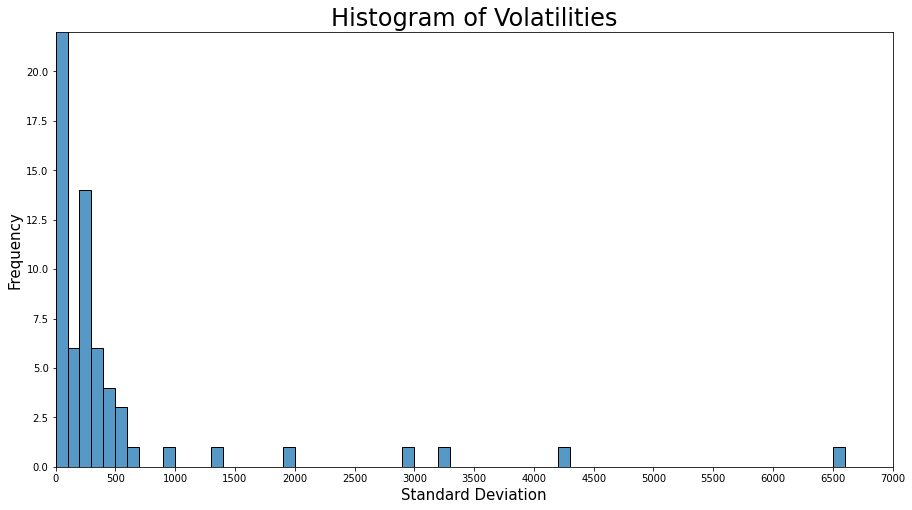

In [8]:
plt.figure(figsize = (15,8))
volatilities_chart = sns.histplot(descriptive_sensor, x="std", binwidth=100)
volatilities_chart.set_title('Histogram of Volatilities', fontdict={'size':24})
volatilities_chart.set_xlabel('Standard Deviation',fontdict={'size':15})
volatilities_chart.set_ylabel('Frequency', fontdict={'size':15})
volatilities_chart.set_xticks(range(0,np.rint(volatilities.max()).astype(int)+500,500))

plt.ylim(0, 22)
plt.xlim(0)


In [9]:
nonzero_variance_cols = volatilities[volatilities!=0].index
zero_variance_cols = volatilities[volatilities==0].index

In [10]:
sensor_data[zero_variance_cols]

feature5  feature13  feature42  feature49  feature52  feature69  \
0        100.0        0.0       70.0        1.0        0.0        1.0   
1        100.0        0.0       70.0        1.0        0.0        1.0   
2        100.0        0.0       70.0        1.0        0.0        1.0   
3        100.0        0.0       70.0        1.0        0.0        1.0   
4        100.0        0.0       70.0        1.0        0.0        1.0   
...        ...        ...        ...        ...        ...        ...   
1562     100.0        0.0       70.0        1.0        0.0        1.0   
1563     100.0        0.0       70.0        1.0        0.0        1.0   
1564     100.0        NaN       70.0        1.0        0.0        1.0   
1565     100.0        0.0       70.0        1.0        0.0        1.0   
1566     100.0        NaN       70.0        1.0        0.0        1.0   

      feature97  feature141  feature149  feature178  ...  feature529  \
0           0.0         0.0         0.0         0.0  ...         0.0   
1           0.0         0.0         0.0         0.0  ...         0.0   
2           0.0         0.0         0.0         0.0  ...         0.0   
3           0.0         0.0         0.0         0.0  ...         0.0   
4           0.0         0.0         0.0         0.0  ...         0.0   
...         ...         ...         ...         ...  ...         ...   
1562        0.0         0.0         0.0         0.0  ...         0.0   
1563        0.0         0.0         0.0         0.0  ...         0.0   
1564        0.0         0.0         NaN         0.0  ...         NaN   
1565        0.0         0.0         0.0         0.0  ...         0.0   
1566        0.0         0.0         NaN         0.0  ...         NaN   

      feature530  feature531  feature532  feature533  feature534  feature535  \
0            0.0         0.0         0.0         0.0         0.0         0.0   
1            0.0         0.0         0.0         0.0         0.0         0.0   
2            0.0         0.0         0.0         0.0         0.0         0.0   
3            0.0         0.0         0.0         0.0         0.0         0.0   
4            0.0         0.0         0.0         0.0         0.0         0.0   
...          ...         ...         ...         ...         ...         ...   
1562         0.0         0.0         0.0         0.0         0.0         0.0   
1563         0.0         0.0         0.0         0.0         0.0         0.0   
1564         NaN         NaN         NaN         NaN         NaN         NaN   
1565         0.0         0.0         0.0         0.0         0.0         0.0   
1566         NaN         NaN         NaN         NaN         NaN         NaN   

      feature536  feature537  feature538  
0            0.0         0.0         0.0  
1            0.0         0.0         0.0  
2            0.0         0.0         0.0  
3            0.0         0.0         0.0  
4            0.0         0.0         0.0  
...          ...         ...         ...  
1562         0.0         0.0         0.0  
1563         0.0         0.0         0.0  
1564         NaN         NaN         NaN  
1565         0.0         0.0         0.0  
1566         NaN         NaN         NaN  

[1567 rows x 116 columns]

In [11]:
sensor_data[nonzero_variance_cols]

feature0  feature1   feature2   feature3  feature4  feature6  feature7  \
0      3030.93   2564.00  2187.7333  1411.1265    1.3602   97.6133    0.1242   
1      3095.78   2465.14  2230.4222  1463.6606    0.8294  102.3433    0.1247   
2      2932.61   2559.94  2186.4111  1698.0172    1.5102   95.4878    0.1241   
3      2988.72   2479.90  2199.0333   909.7926    1.3204  104.2367    0.1217   
4      3032.24   2502.87  2233.3667  1326.5200    1.5334  100.3967    0.1235   
...        ...       ...        ...        ...       ...       ...       ...   
1562   2899.41   2464.36  2179.7333  3085.3781    1.4843   82.2467    0.1248   
1563   3052.31   2522.55  2198.5667  1124.6595    0.8763   98.4689    0.1205   
1564   2978.81   2379.78  2206.3000  1110.4967    0.8236   99.4122    0.1208   
1565   2894.92   2532.01  2177.0333  1183.7287    1.5726   98.7978    0.1213   
1566   2944.92   2450.76  2195.4444  2914.1792    1.5978   85.1011    0.1235   

      feature8  feature9  feature10  ...  feature580  feature581  feature582  \
0       1.5005    0.0162    -0.0034  ...         NaN         NaN      0.5005   
1       1.4966   -0.0005    -0.0148  ...      0.0060    208.2045      0.5019   
2       1.4436    0.0041     0.0013  ...      0.0148     82.8602      0.4958   
3       1.4882   -0.0124    -0.0033  ...      0.0044     73.8432      0.4990   
4       1.5031   -0.0031    -0.0072  ...         NaN         NaN      0.4800   
...        ...       ...        ...  ...         ...         ...         ...   
1562    1.3424   -0.0045    -0.0057  ...      0.0047    203.1720      0.4988   
1563    1.4333   -0.0061    -0.0093  ...         NaN         NaN      0.4975   
1564       NaN       NaN        NaN  ...      0.0025     43.5231      0.4987   
1565    1.4622   -0.0072     0.0032  ...      0.0075     93.4941      0.5004   
1566       NaN       NaN        NaN  ...      0.0045    137.7844      0.4987   

      feature583  feature584  feature585  feature586  feature587  feature588  \
0         0.0118      0.0035      2.3630         NaN         NaN         NaN   
1         0.0223      0.0055      4.4447      0.0096      0.0201      0.0060   
2         0.0157      0.0039      3.1745      0.0584      0.0484      0.0148   
3         0.0103      0.0025      2.0544      0.0202      0.0149      0.0044   
4         0.4766      0.1045     99.3032      0.0202      0.0149      0.0044   
...          ...         ...         ...         ...         ...         ...   
1562      0.0143      0.0039      2.8669      0.0068      0.0138      0.0047   
1563      0.0131      0.0036      2.6238      0.0068      0.0138      0.0047   
1564      0.0153      0.0041      3.0590      0.0197      0.0086      0.0025   
1565      0.0178      0.0038      3.5662      0.0262      0.0245      0.0075   
1566      0.0181      0.0040      3.6275      0.0117      0.0162      0.0045   

      feature589  
0            NaN  
1       208.2045  
2        82.8602  
3        73.8432  
4        73.8432  
...          ...  
1562    203.1720  
1563    203.1720  
1564     43.5231  
1565     93.4941  
1566    137.7844  

[1567 rows x 474 columns]

In [12]:
descriptive_sensor["missing_percentage"].describe()

count    590.000000
mean       4.537549
std       15.433986
min        0.000000
25%        0.127632
50%        0.382897
75%        0.574346
max       91.193363
Name: missing_percentage, dtype: float64

## 2. Histogram of Missing Values of Features (Percentage)

(0.0, 99.75)

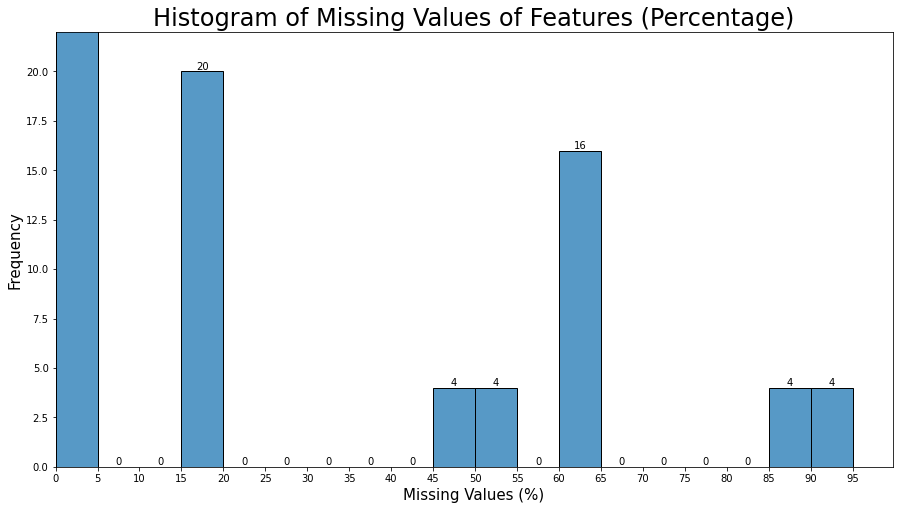

In [15]:
plt.figure(figsize = (15,8))

missingval_chart = sns.histplot(descriptive_sensor, x="missing_percentage", binwidth=5,stat='count',legend=True)
missingval_chart.set_title('Histogram of Missing Values of Features (Percentage)', fontdict={'size':24})
missingval_chart.set_xlabel('Missing Values (%)',fontdict={'size':15})
missingval_chart.set_ylabel('Frequency', fontdict={'size':15})
missingval_chart.set_xticks(range(0,100,5))

plt.bar_label(missingval_chart.containers[0])
    
plt.ylim(0, 22)
plt.xlim(0)

## 3. Total Number of Duplicated Columns

In [16]:
sensor_data.transpose().duplicated().sum()

104

In [17]:
# Create Dataframe for duplicated columns in feature dataset(True/False)
duplicated_df = pd.DataFrame(sensor_data.transpose().duplicated())

# Change column name
duplicated_df.columns = ["duplicated"]

# Get only True values for duplicated columns
duplicated_columns = duplicated_df[duplicated_df["duplicated"]==True]

print("Number of duplicated columns = {}".format(len(duplicated_columns)))

Number of duplicated columns = 104


## 4. Histogram of Number of Outliers

(0.0, 78.75)

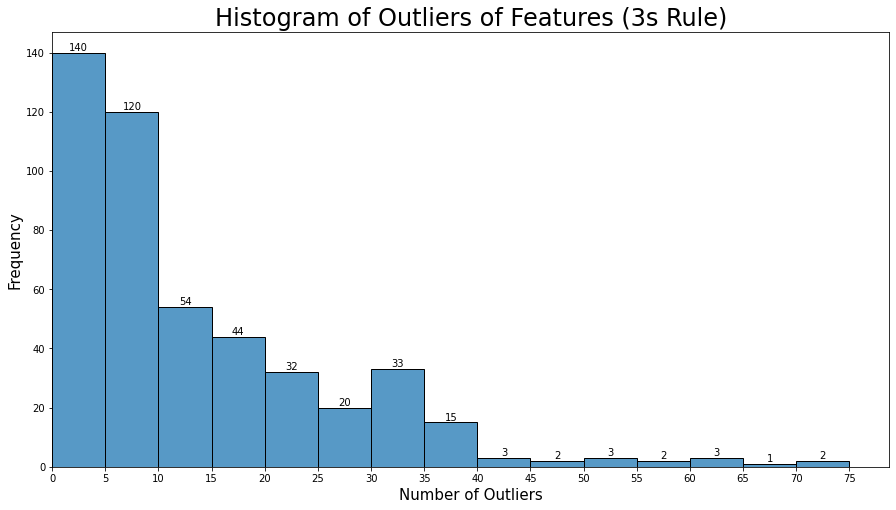

In [18]:
plt.figure(figsize = (15,8))
outliers_chart = sns.histplot(descriptive_sensor, x="outliers", binwidth=5)
outliers_chart.set_title('Histogram of Outliers of Features (3s Rule)', fontdict={'size':24})
outliers_chart.set_xlabel('Number of Outliers',fontdict={'size':15})
outliers_chart.set_ylabel('Frequency', fontdict={'size':15})
plt.bar_label(outliers_chart.containers[0])
outliers_chart.set_xticks(range(0,80,5))
plt.xlim(0)


## 5. Correlation Heatmap of Features

In [19]:
# Pearson Correlation Matrix of Feature Data
correlation_matrix = sensor_data.corr()
correlation_matrix

feature0  feature1  feature2  feature3  feature4  feature5  \
feature0    1.000000 -0.145071  0.004775 -0.007655 -0.011047       NaN   
feature1   -0.145071  1.000000  0.005802 -0.007603 -0.001641       NaN   
feature2    0.004775  0.005802  1.000000  0.298935  0.095891       NaN   
feature3   -0.007655 -0.007603  0.298935  1.000000 -0.058483       NaN   
feature4   -0.011047 -0.001641  0.095891 -0.058483  1.000000       NaN   
...              ...       ...       ...       ...       ...       ...   
feature585  0.023605  0.002273  0.015765  0.026043 -0.001617       NaN   
feature586  0.018472 -0.009417 -0.025548  0.034779 -0.044016       NaN   
feature587 -0.025909  0.017290 -0.029479 -0.039309 -0.031145       NaN   
feature588 -0.028196  0.010134 -0.030943 -0.033780 -0.026204       NaN   
feature589  0.004177  0.044834 -0.033226 -0.081157  0.051428       NaN   

            feature6  feature7  feature8  feature9  ...  feature580  \
feature0    0.002281  0.031510 -0.052731  0.009052  ...   -0.070137   
feature1   -0.025702 -0.012084  0.031321  0.024015  ...    0.073211   
feature2   -0.136225 -0.273970  0.023609  0.016291  ...   -0.018721   
feature3   -0.685835  0.138290 -0.103656  0.068998  ...   -0.057051   
feature4   -0.074368 -0.916410 -0.026035  0.054619  ...   -0.041290   
...              ...       ...       ...       ...  ...         ...   
feature585 -0.039569  0.010345  0.017930 -0.036132  ...   -0.000395   
feature586 -0.041296  0.058171  0.010436  0.033759  ...    0.249926   
feature587  0.034184 -0.021472  0.022853  0.059341  ...    0.975470   
feature588  0.032359 -0.020962  0.026261  0.060803  ...    1.000000   
feature589  0.044227 -0.107875 -0.022776  0.004882  ...    0.379167   

            feature581  feature582  feature583  feature584  feature585  \
feature0     -0.028380    0.000225    0.023469    0.019921    0.023605   
feature1      0.083463    0.043690    0.002905   -0.001264    0.002273   
feature2     -0.010759   -0.006061    0.015711    0.018237    0.015765   
feature3     -0.096619    0.009045    0.025461    0.024754    0.026043   
feature4      0.088327    0.045361   -0.001301   -0.001598   -0.001617   
...                ...         ...         ...         ...         ...   
feature585   -0.000673   -0.197363    0.999890    0.995342    1.000000   
feature586   -0.475397   -0.016726    0.002257    0.001606    0.002744   
feature587    0.396369   -0.024481   -0.002650   -0.002498   -0.002931   
feature588    0.379167   -0.020712   -0.002261   -0.001957   -0.002531   
feature589    1.000000    0.041494   -0.003008   -0.003295   -0.003801   

            feature586  feature587  feature588  feature589  
feature0      0.018472   -0.025909   -0.028196    0.004177  
feature1     -0.009417    0.017290    0.010134    0.044834  
feature2     -0.025548   -0.029479   -0.030943   -0.033226  
feature3      0.034779   -0.039309   -0.033780   -0.081157  
feature4     -0.044016   -0.031145   -0.026204    0.051428  
...                ...         ...         ...         ...  
feature585    0.002744   -0.002931   -0.002531   -0.003801  
feature586    1.000000    0.167913    0.164238   -0.486559  
feature587    0.167913    1.000000    0.974276    0.390813  
feature588    0.164238    0.974276    1.000000    0.389211  
feature589   -0.486559    0.390813    0.389211    1.000000  

[590 rows x 590 columns]

Text(0.5, 1.0, 'Correlation Heatmap of Features (3s Rule)')

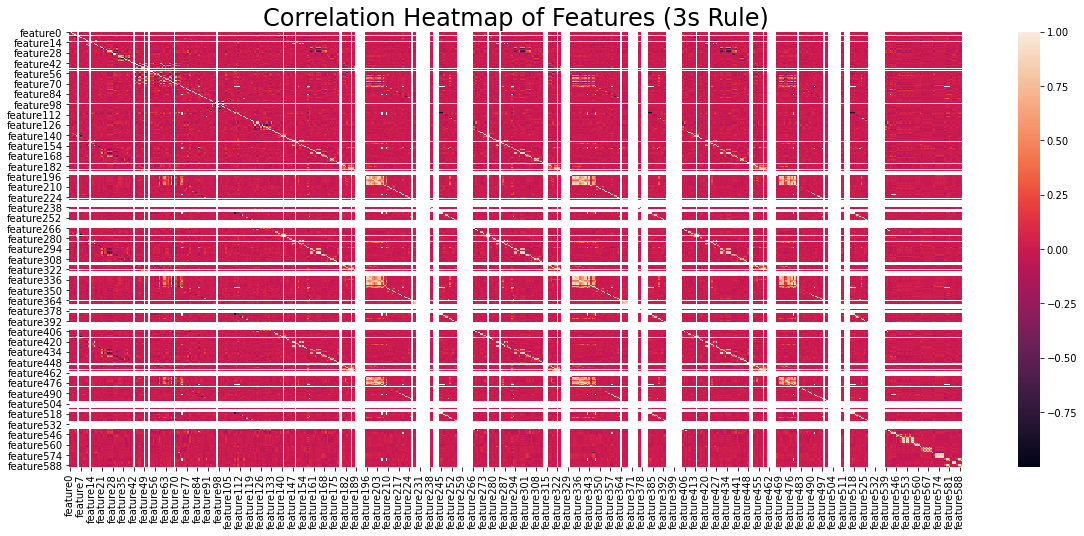

In [38]:
# Correlation Heatmap
plt.figure(figsize = (20,8))
correlation_heatmap = sns.heatmap(correlation_matrix)
correlation_heatmap.set_title('Correlation Heatmap of Features (3s Rule)', fontdict={'size':24})


# Label Data (Target)

In [21]:
# Read semiconductor quality data (label)
labels_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data",sep=" ",header=None)

In [22]:
# Data types in Label Data
type_dct = {str(k): len(list(v)) for k, v in labels_data.groupby(labels_data.dtypes, axis=1)}
type_dct

{'int64': 1, 'object': 1}

In [23]:
# Change column names
labels_data.columns = ["Label","Time"]

# Convert type of columns
labels_data["Label"] = labels_data["Label"].astype("category")

labels_data["Time"] = pd.to_datetime(labels_data["Time"])

In [24]:
print("first date = {}:".format(labels_data["Time"].min()))
print("last date = {}:".format(labels_data["Time"].max()))

first date = 2008-01-08 02:02:00:
last date = 2008-12-10 18:47:00:


## 6. Frequency distribution of Labels

Text(0.5, 1.0, 'Distribution of Labels')

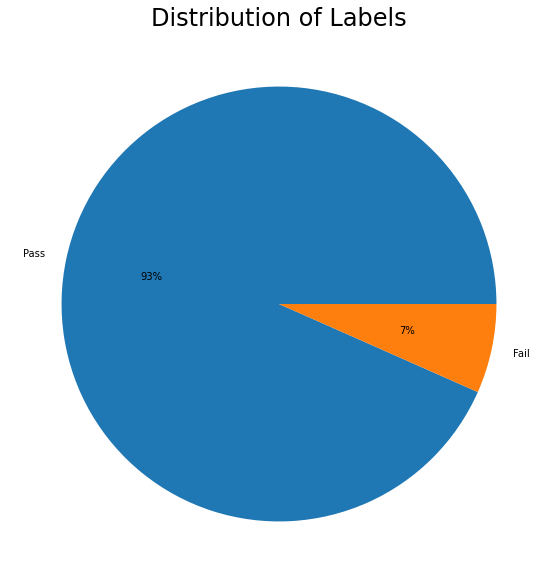

In [25]:
# Set size of chart
plt.figure(figsize = (10,10))

# Labels for data
keys = ['Pass','Fail']

# Plotting data on Pie chart
Piechart_Labels = plt.pie(labels_data.Label.value_counts(), labels=keys, autopct='%.0f%%')

# Add title to the chart
plt.title('Distribution of Labels',fontdict={'size':24})

## 7. Timeseries of Label Value Frequencies (Pass/Fail)

In [26]:
import datetime as dt

# Create a Date column from Time (timestamp) Column of Label Data 
labels_data["Date"] = labels_data["Time"].dt.date

print("first date = {}".format(labels_data["Date"].min()))
print("last date = {}".format(labels_data["Date"].max()))

# Create a Dataframe by Grouping Labels by Date and calculating the frequencies (count) of Label Values
timeseries_label_count = pd.DataFrame(labels_data.groupby("Date")["Label"].value_counts())

# Rename Calculated column as "Count"
timeseries_label_count = timeseries_label_count.rename(columns={'Label': 'Count'})

# Reset index of grouped Dataframe
timeseries_label_count.reset_index(inplace=True)

# Rename Label values as Pass and Fail
timeseries_label_count["Label"] = timeseries_label_count["Label"].replace(to_replace=[-1, 1], value=["Pass","Fail"])


first date = 2008-01-08
last date = 2008-12-10


Text(0, 0.5, 'Frequency')

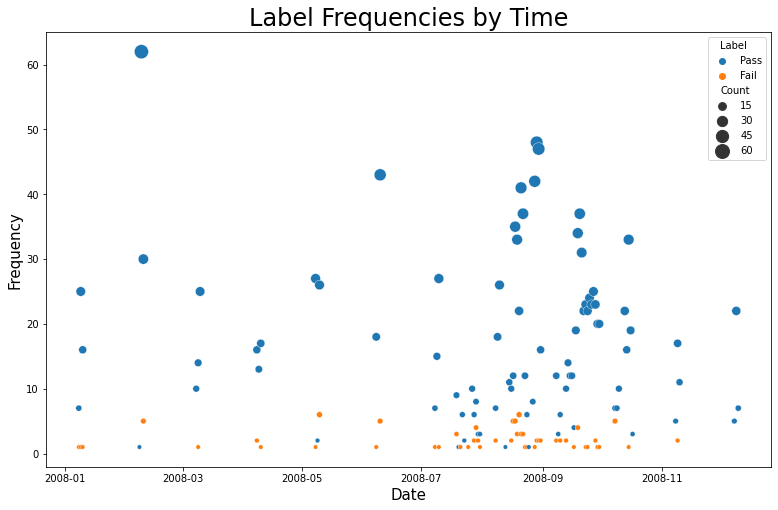

In [36]:
# Set size of chart
plt.figure(figsize = (13,8))

# create the scatter plot
timeseries_label_scatterplot = sns.scatterplot(data=timeseries_label_count, x="Date", y="Count", size = "Count", hue="Label", sizes=(20, 200))

timeseries_label_scatterplot.set_title('Label Frequencies by Time', fontdict={'size':24})
timeseries_label_scatterplot.set_xlabel('Date',fontdict={'size':15})
timeseries_label_scatterplot.set_ylabel('Frequency', fontdict={'size':15})

In [37]:
# Plot Timeseries of Label Frequencies
fig = px.scatter(timeseries_label_count, x='Date', y="Count", color="Label",size='Count', title="Label Frequencies by Time")

fig.show()

# Dimensionality Reduction

Before everything else, we should merge label and feature data and split data to make our train/test set. 


# Create train and test dataset


Since according to dataset's description, target values are highly imbalanced, so we split it in a stratified fashion.

In [ ]:
# Merge sensor and label data
merged_df = pd.concat([labels_data,sensor_data],axis=1)
merged_df.drop("Time",axis=1,inplace=True)

# Create training and test datasets
X = merged_df.drop(["Label"],axis=1)
Y = merged_df["Label"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify=Y)

In [ ]:
merged_df = pd.concat([labels_data,sensor_data],axis=1)

In [ ]:
merged_df["Time"].duplicated().sum()

33

In [ ]:
print("shape of feature train set :{} and shape of feature test set: {}".format(X_train.shape, X_test.shape))

shape of feature train set :(1253, 590) and shape of feature test set: (314, 590)


In [ ]:
print("shape of label train set :{} and shape of label test set: {}".format(Y_train.shape, Y_test.shape))

shape of label train set :(1253,) and shape of label test set: (314,)


In [ ]:
Y_train.value_counts(normalize=True) * 100

-1    93.375898
1      6.624102
Name: Label, dtype: float64

In [ ]:
fig = px.pie(
    Y_train.value_counts(),
    values='Label',
    names=["PASS", "FAIL"],
    title="Train Label Set Distribution",
    width=500
)

fig.show()

In [ ]:
fig = px.pie(
    Y_test.value_counts(),
    values='Label',
    names=["PASS", "FAIL"],
    title="Test Label Set Distribution",
    width=500
)

fig.show()

## Re-label the Target values

Each failure is is encoded as 0 while 1 corresponds to a pass

In [ ]:
Y_train = Y_train.replace(to_replace=[-1, 1], value=[1, 0])
Y_test = Y_test.replace(to_replace=[-1, 1], value=[1, 0])

From now on, we will deal with training data

# Drop features having missing value percentage above threshold (50%)

We select the columns having less than 50% missing values.

In [ ]:
percent_missing = X_train.isnull().sum() * 100 / len(X_train)
percent_missing

feature0      0.399042
feature1      0.399042
feature2      1.037510
feature3      1.037510
feature4      1.037510
                ...   
feature585    0.079808
feature586    0.079808
feature587    0.079808
feature588    0.079808
feature589    0.079808
Length: 590, dtype: float64

In [ ]:
selected_cols = percent_missing[percent_missing<50].index
missings_dropped = X_train[selected_cols]
print("{} columns were dropped".format(X_train.shape[1] - missings_dropped.shape[1]))

24 columns were dropped


# Drop constant variables

In [ ]:
unique_series = missings_dropped.nunique()
constants_dropped = missings_dropped[unique_series[unique_series != 1].index]
print("{} columns were dropped".format(missings_dropped.shape[1] - constants_dropped.shape[1]))

116 columns were dropped


In [ ]:
constants_dropped.describe()

feature0     feature1     feature2     feature3     feature4  \
count  1248.000000  1248.000000  1240.000000  1240.000000  1240.000000   
mean   3014.207228  2496.611378  2200.151328  1387.511151     3.124149   
std      73.029160    80.102790    29.445513   431.115520    44.594150   
min    2743.240000  2162.870000  2060.660000   711.025800     0.681500   
25%    2965.715000  2454.682500  2181.155500  1080.498500     1.016000   
50%    3011.405000  2500.220000  2200.955600  1283.436800     1.316800   
75%    3056.310000  2539.595000  2218.055500  1588.509000     1.529100   
max    3356.350000  2846.440000  2315.266700  3715.041700  1112.160000   

          feature6     feature7     feature8     feature9    feature10  ...  \
count  1240.000000  1245.000000  1251.000000  1251.000000  1251.000000  ...   
mean    101.240427     0.121980     1.464348    -0.001100     0.000131  ...   
std       6.221999     0.007982     0.073735     0.015145     0.009304  ...   
min      82.131100     0.000000     1.191000    -0.041000    -0.034900  ...   
25%      98.113300     0.121100     1.412100    -0.010900    -0.005500  ...   
50%     101.611100     0.122400     1.463600    -0.001300     0.000400  ...   
75%     104.626700     0.123800     1.518950     0.008200     0.005800  ...   
max     129.252200     0.128600     1.656400     0.074900     0.053000  ...   

        feature576   feature577   feature582   feature583   feature584  \
count  1253.000000  1253.000000  1252.000000  1252.000000  1252.000000   
mean      5.400117    16.527139     0.499997     0.015460     0.003879   
std      16.424839    12.051509     0.003449     0.019043     0.004133   
min       0.898700     4.582000     0.477800     0.006500     0.002000   
25%       1.409100    11.477900     0.497800     0.011600     0.003100   
50%       1.627000    13.817200     0.500000     0.013700     0.003600   
75%       1.902000    17.177000     0.502200     0.016400     0.004100   
max      90.423500    96.960100     0.509800     0.476600     0.104500   

        feature585   feature586   feature587   feature588   feature589  
count  1252.000000  1252.000000  1252.000000  1252.000000  1252.000000  
mean      3.098152     0.021659     0.016391     0.005255    98.443809  
std       3.969051     0.012508     0.008499     0.002758    93.163788  
min       1.284500    -0.016900     0.003200     0.001000     0.000000  
25%       2.309350     0.013700     0.010700     0.003400    44.096100  
50%       2.742900     0.020700     0.014800     0.004600    71.533300  
75%       3.281175     0.027700     0.020300     0.006400   114.415300  
max      99.303200     0.102800     0.079900     0.028600   737.304800  

[8 rows x 450 columns]

In [ ]:
fig = go.Figure(data=go.Heatmap(z=constants_dropped.corr()))

# Add axis labels and title
fig.update_layout(title_text="Correlation Heatmap")
fig.update_xaxes(title_text="Variable")
fig.update_yaxes(title_text="Variable")

# Show the plot
fig.show()

# Drop highly correlated variables

In [ ]:
constants_dropped.isnull().sum().describe()

count    450.000000
mean      24.913333
std       87.949034
min        0.000000
25%        1.000000
50%        3.000000
75%        8.000000
max      615.000000
dtype: float64

In [ ]:
cor_matrix = constants_dropped.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

In [ ]:
to_drop80 = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

In [ ]:
correlation_dropped = constants_dropped[to_drop80]

In [ ]:
print("{} columns were dropped".format(constants_dropped.shape[1] - correlation_dropped.shape[1]))

220 columns were dropped


Two approaches are available to reduce dimensionality:

Feature extraction: creating a subset of new features by combinations of the existing features (example: PCA)

Feature selection: choosing a subset of all the features (example: Recursive Feature Elimination)

## Duplicate identification

### Number of Duplicated Observations (Rows)

In [ ]:
constants_dropped[to_drop80].duplicated().sum()

0

### Number of Duplicated Features (Columns)

In [ ]:
constants_dropped[to_drop80].transpose().duplicated().sum()

0

In [ ]:
correlation_dropped.shape

(1253, 230)

In [ ]:
correlation_dropped.isnull().sum().describe()

count    230.000000
mean      26.426087
std       95.542173
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max      615.000000
dtype: float64

In [ ]:
fig = go.Figure(data=go.Heatmap(z=correlation_dropped.corr()))

# Add axis labels and title
fig.update_layout(title_text="Correlation Heatmap")
fig.update_xaxes(title_text="Variable")
fig.update_yaxes(title_text="Variable")

# Show the plot
fig.show()

In [ ]:
cor_matrix = correlation_dropped.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

In [ ]:
upper_tri

feature17  feature26  feature27  feature30  feature36  feature39  \
feature17         NaN    0.03924   0.115514   0.013005   0.012167   0.019082   
feature26         NaN        NaN   0.789821   0.030059   0.044660   0.029570   
feature27         NaN        NaN        NaN   0.015336   0.048295   0.041515   
feature30         NaN        NaN        NaN        NaN   0.049610   0.064075   
feature36         NaN        NaN        NaN        NaN        NaN   0.804616   
...               ...        ...        ...        ...        ...        ...   
feature576        NaN        NaN        NaN        NaN        NaN        NaN   
feature577        NaN        NaN        NaN        NaN        NaN        NaN   
feature584        NaN        NaN        NaN        NaN        NaN        NaN   
feature585        NaN        NaN        NaN        NaN        NaN        NaN   
feature588        NaN        NaN        NaN        NaN        NaN        NaN   

            feature46  feature50  feature54  feature60  ...  feature567  \
feature17    0.012315   0.012344   0.026321   0.031738  ...    0.023168   
feature26    0.000210   0.016141   0.026996   0.032530  ...    0.004022   
feature27    0.028800   0.013683   0.002584   0.057582  ...    0.010521   
feature30    0.049110   0.037956   0.114440   0.023663  ...    0.033051   
feature36    0.068198   0.059408   0.007208   0.040610  ...    0.024288   
...               ...        ...        ...        ...  ...         ...   
feature576        NaN        NaN        NaN        NaN  ...         NaN   
feature577        NaN        NaN        NaN        NaN  ...         NaN   
feature584        NaN        NaN        NaN        NaN  ...         NaN   
feature585        NaN        NaN        NaN        NaN  ...         NaN   
feature588        NaN        NaN        NaN        NaN  ...         NaN   

            feature568  feature569  feature574  feature575  feature576  \
feature17     0.039804    0.044290    0.083673    0.076364    0.085824   
feature26     0.037120    0.020609    0.027494    0.000947    0.029180   
feature27     0.039874    0.037655    0.039350    0.010417    0.041224   
feature30     0.059778    0.029332    0.035884    0.046602    0.037718   
feature36     0.018313    0.053212    0.007130    0.008488    0.012475   
...                ...         ...         ...         ...         ...   
feature576         NaN         NaN         NaN         NaN         NaN   
feature577         NaN         NaN         NaN         NaN         NaN   
feature584         NaN         NaN         NaN         NaN         NaN   
feature585         NaN         NaN         NaN         NaN         NaN   
feature588         NaN         NaN         NaN         NaN         NaN   

            feature577  feature584  feature585  feature588  
feature17     0.019657    0.007321    0.007591    0.019687  
feature26     0.018355    0.012264    0.014081    0.040453  
feature27     0.047924    0.012399    0.017821    0.046212  
feature30     0.032028    0.099455    0.097780    0.001938  
feature36     0.002246    0.123432    0.120886    0.002427  
...                ...         ...         ...         ...  
feature576    0.841864    0.020740    0.019090    0.016330  
feature577         NaN    0.032020    0.027933    0.027211  
feature584         NaN         NaN    0.996102    0.001772  
feature585         NaN         NaN         NaN    0.000064  
feature588         NaN         NaN         NaN         NaN  

[230 rows x 230 columns]

In [ ]:
correlation_dropped.describe()

feature17    feature26    feature27    feature30    feature36  \
count  1250.000000  1252.000000  1252.000000  1252.000000  1253.000000   
mean      0.971376     1.938165     6.653330     0.184839    49.416541   
std       0.013046     0.197334     1.238760     0.032731     1.202752   
min       0.579400     0.000000     0.000000     0.034100    40.228900   
25%       0.968400     1.938800     6.992475     0.162625    49.431800   
50%       0.972400     1.986700     7.265000     0.187200    49.603600   
75%       0.976800     2.003800     7.329775     0.208100    49.751100   
max       0.984800     2.052800     7.658800     0.284300    50.165200   

         feature39    feature46    feature50    feature54    feature60  ...  \
count  1253.000000  1252.000000  1252.000000  1250.000000  1249.000000  ...   
mean    118.688637   733.549550   632.207903     4.838982   355.128256  ...   
std       1.863580    12.155714     8.610926     0.055926     5.967643  ...   
min     111.712800   699.813900   607.392700     4.284000   324.714500  ...   
25%     118.022000   724.357325   625.846150     4.817000   350.617300  ...   
50%     118.400800   733.411800   631.395000     4.844000   353.777300  ...   
75%     118.928800   741.409500   638.119975     4.869000   359.673600  ...   
max     133.389800   789.752300   667.741800     5.011000   373.812700  ...   

        feature567   feature568   feature569   feature574   feature575  \
count  1020.000000  1020.000000  1020.000000  1253.000000  1253.000000   
mean      0.060092     2.425366    21.110712     8.847808     0.104185   
std       0.033348     0.937455    10.438858    25.906436     0.065636   
min       0.009100     0.370600     3.250400     1.565000     0.023000   
25%       0.038200     1.884400    15.466200     2.571900     0.074600   
50%       0.047900     1.981200    16.964200     2.987000     0.089300   
75%       0.074850     2.937300    24.685000     3.493900     0.113000   
max       0.293200     5.957900    84.802400   156.858100     0.550200   

        feature576   feature577   feature584   feature585   feature588  
count  1253.000000  1253.000000  1252.000000  1252.000000  1252.000000  
mean      5.400117    16.527139     0.003879     3.098152     0.005255  
std      16.424839    12.051509     0.004133     3.969051     0.002758  
min       0.898700     4.582000     0.002000     1.284500     0.001000  
25%       1.409100    11.477900     0.003100     2.309350     0.003400  
50%       1.627000    13.817200     0.003600     2.742900     0.004600  
75%       1.902000    17.177000     0.004100     3.281175     0.006400  
max      90.423500    96.960100     0.104500    99.303200     0.028600  

[8 rows x 230 columns]

In [ ]:
describe_lastversion = correlation_dropped.describe().T

In [ ]:
describe_lastversion["std"].describe()

count     230.000000
mean       38.935341
std       254.322985
min         0.000215
25%         0.063875
50%         1.618235
75%         9.099010
max      3194.624832
Name: std, dtype: float64

In [ ]:
object = StandardScaler()
stdscaled_correlation_dropped = object.fit_transform(correlation_dropped)

In [ ]:
# Create the histogram
fig = go.Figure(data=[go.Histogram(x=stdscaled_correlation_dropped[0])])

# Set the plot title and axes labels
fig.update_layout(title="Histogram of Volatility of Features (Standardized)",
                  xaxis_title="Volatility",
                  yaxis_title="Count")
# Set the x-axis range to start from zero
fig.update_xaxes(title_text="Count", range=[0, max(fig.data[0].x)*1.1]) 

go.Histogram()

# Show the plot
fig.show()

## Impute Missing Values

### Detecting Multicollinearity by Calculating VIFs (Variance Inflation Factors)

VIFs are often used in regression analysis to detect multicollinearity, which is a situation where two or more independent variables in a regression model are highly correlated with each other. VIFs are preferred over pairwise correlations for several reasons:

VIFs take into account the effect of all other independent variables in the model on a given independent variable, while pairwise correlations only consider the relationship between two variables. This means that VIFs provide a more accurate measure of the degree of multicollinearity between a given independent variable and all other independent variables in the model.

Pairwise correlations can be misleading when there are multiple correlated independent variables in the model, as they do not take into account the joint effect of all these variables on the dependent variable. This can lead to overestimation or underestimation of the significance of individual independent variables.

VIFs are specifically designed to detect multicollinearity, while pairwise correlations do not provide a direct measure of multicollinearity.

VIFs can help identify the specific independent variables that are causing multicollinearity, allowing the researcher to take appropriate measures such as removing or transforming one of the variables.

In summary, VIFs are preferred over pairwise correlations for detecting multicollinearity because they provide a more accurate and comprehensive measure of the degree of multicollinearity between a given independent variable and all other

#### Interpretation of VIF

A VIF value of 1 indicates no correlation between the predictor variables, while a value greater than 1 indicates increasing levels of correlation between the predictor variables.

Typically, a VIF value greater than 5 or 10 indicates significant multicollinearity and suggests that the variable may need to be removed from the model. However, the threshold for an acceptable VIF value may vary depending on the context and specific research questions.

In summary, VIF provides information on the degree of multicollinearity in a regression model and helps to identify predictor variables that may need to be removed from the model to improve its accuracy and reliability.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(constants_dropped.values, i) for i in range(constants_dropped.values.shape[1])]
vif["features"] = X_train.columns
print(vif.round(1))


MissingDataError: exog contains inf or nans